# Spotify Songs  - Part 1: Exploration & Visualization 

This <a href="https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db/data#">dataset</a>
 containts 235,725 songs from spotify, there are approximately 10,000 songs per genre. This is part 1 of a project. In the second part I try to predict the genre of songs. 
 
#### Use <a href="https://nbviewer.jupyter.org/ ">nbviewer</a> to see all of the graphs, including plotly

#### Variables
Tempo : Measured in Beats Per Minute <br>
Energy: The energy of a song - the higher the value, the more energtic.<br>
Danceability: The higher the value, the easier it is to dance to this song.<br>
Loudness..dB: The higher the value, the louder the song.<br>
Liveness: The higher the value, the more likely the song is a live recording.<br>
Valence: The higher the value, the more positive mood for the song.<br>
Duration_ms: The duration of the song.<br>
Acousticness:The higher the value the more acoustic the song is.<br>
Speechiness:The higher the value the more spoken word the song contains.<br>
Popularity:The higher the value the more popular the song is.<br>
key: The key the song was composed in e.g. F#, G, A#<br>
mode: The musical scale e.g. minor or major <br>

In [99]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns; sns.set(style='whitegrid')
from sklearn import preprocessing
from info_gain import info_gain


In [100]:
df = pd.read_csv('SpotifyFeatures.csv', index_col = "track_id")   

In [101]:
# checking for duplicates and missing values  
test = df.duplicated().sum()
print('The number of duplicates is:',test)

test2 = df.isnull().sum()
print("Missing values by variable:")
print(test2)

The number of duplicates is: 0
Missing values by variable:
genre               0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


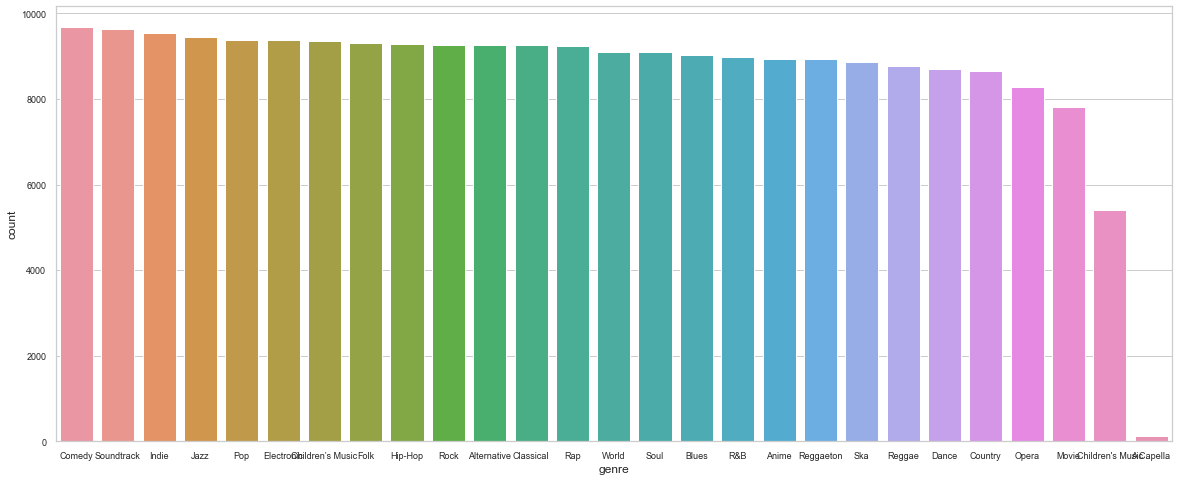

In [102]:
# Plotting genre frequency
plt.figure(figsize=(20,8))
ax = sns.countplot(x="genre", data=df, order = df['genre'].value_counts().index)
ax.tick_params(labelsize = 9)
plt.show()


In [103]:
### The 'Children's Music' genre appears twice in our dataset, and there are very few songs of the 'A Capella' genre. 
### Now duplicated & low frequency genres are dropped 
df = df[(df.genre != "A Capella") & (df.genre != "Children's Music")]

### What is comedy? Are those tuples songs in the traditional sense? 

Text(0.5, 1.0, 'Instrumentalness')

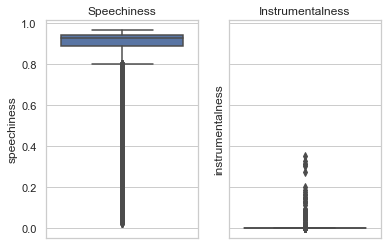

In [104]:
dfC = df[df.genre == 'Comedy']

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.boxplot(y=dfC["speechiness"], ax = ax1).set_title('Speechiness')
sns.boxplot(y=dfC["instrumentalness"],ax = ax2).set_title('Instrumentalness')


We see that 'Comdedy' tracks have a very high degree of "Speechiness", and practically zero 'Instrumentalness'. Except for a few outliers. So we are dealing with Stand-up comedians performances or similar formats. The outliers in instrumentalness could be explained by songs that are played as introductions.  

### Transformation & Normalization 
The categorical varibales 'key' and 'mode' get transformed. The variable 'tempo' is measured in Beats per Minute (BPM), e.g. 120; 160; 80. As most other variables are already on a scale from 0 to 1, it can be helpful to have 'tempo' on the same scale for visualization later on. 

In [105]:
# Transforming 'key' and 'mode'   
df["key"] = df["key"].astype('category')
df['key_codes'] = df['key'].cat.codes

df["mode"] = df["mode"].astype('category')
df['mode_codes'] = df['mode'].cat.codes

# Normalize 'tempo', which is measured in Beats per Minute (BPM)
df2 = df
df2.reset_index(level=0, inplace=True)

df_temp = pd.DataFrame(df2['tempo'])
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_temp)

# Create new column with normalized BPM values 
df['tempo_norm'] = pd.DataFrame(x_scaled)

### Correlation matrix - Do some variables correlate with each other? 

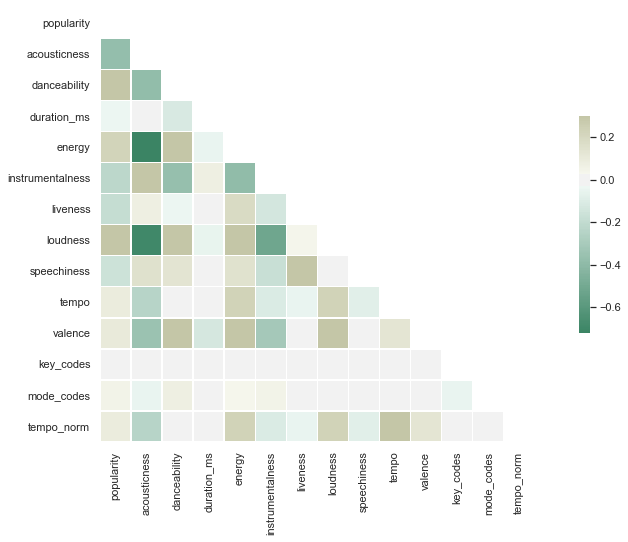

In [106]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 8))

# Color map
cmap = sns.diverging_palette(150, 90, as_cmap=True)

# Heatmap
sns.heatmap(corr, mask=mask, cmap= cmap , vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Most popular songs 

In [107]:
mean_pop = df['popularity'].mean()
mean_pop

42.02107366540054

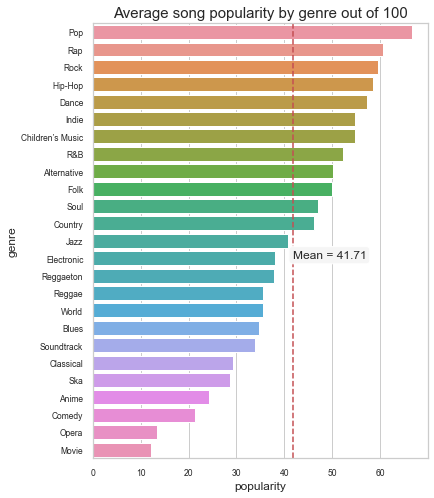

In [108]:
genre_mean = df.groupby(['genre']).mean()

df_p = genre_mean[['popularity']].sort_values('popularity', axis = 0, ascending = False)
df_p.reset_index(level=0, inplace=True)

mean_pop = df_p['popularity'].mean()
# Plot mean 
f, ax = plt.subplots(figsize=(6, 8))
ax.set_title('Average song popularity by genre out of 100', fontsize = 15)
sns.barplot(x= df_p.popularity , y=df_p.genre, data=df_p)
plt.axvline(x=mean_pop, color='r', linestyle='--')  # dotted line 
ax.tick_params(labelsize = 8.5)
plt.text(x=mean_pop, y=13, s="Mean = 41.71", fontsize=12,
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.3"));

plt.show()

In [109]:
### Median
genre_median = df.groupby(['genre']).median()
df_p_median = genre_median[['popularity']].sort_values('popularity', axis = 0, ascending = False)
df_p_median.reset_index(level=0, inplace=True)


In [110]:
df2.head()

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,key_codes,mode_codes,tempo_norm
0,0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,...,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,4,0,0.642704
1,0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,...,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,9,1,0.675801
2,0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,...,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,3,1,0.325182
3,0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,...,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,4,0,0.665238
4,0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,...,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,8,0,0.518516


## Where do mean and median differ most?

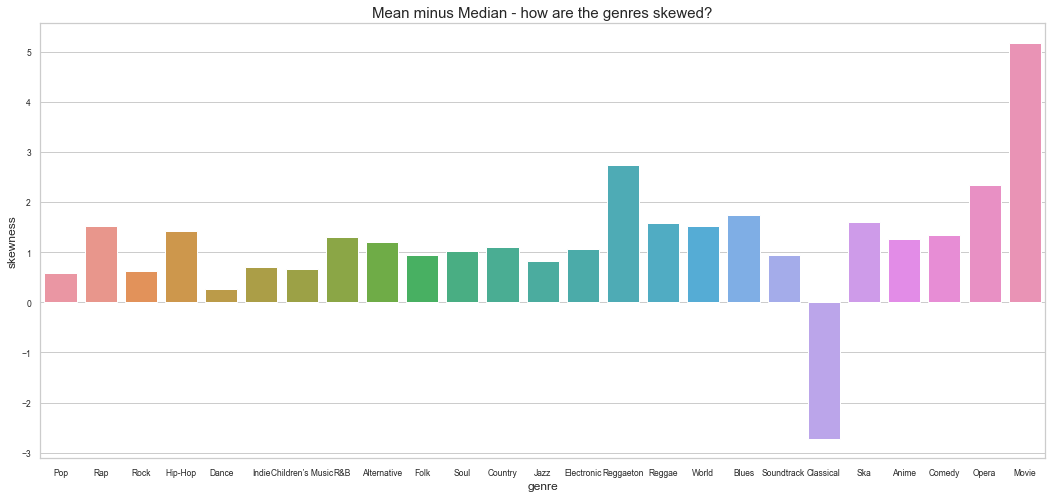

In [111]:
df_p['skewness'] = df_p['popularity'] - df_p_median['popularity']


f, ax = plt.subplots(figsize=(18, 8))
ax.tick_params(labelsize = 8.5)
ax.set_title('Mean minus Median - how are the genres skewed?', fontsize = 15)
sns.barplot(x = df_p.genre, y= df_p.skewness, data=df_p)



#### Distplot of the popularity of Classical songs

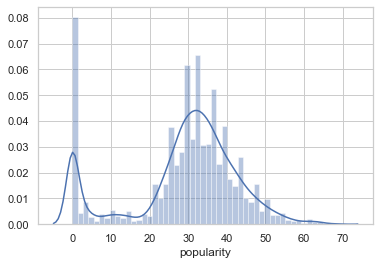

In [112]:
sns.distplot(df2['popularity'].loc[(df2['genre'] =='Classical')])

#### Distplot of the popularity of Classical songs

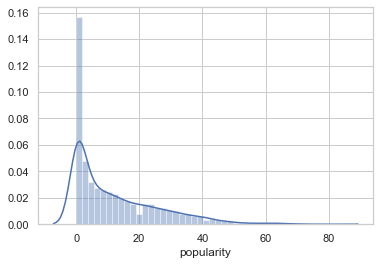

In [113]:
sns.distplot(df2['popularity'].loc[(df2['genre'] =='Movie')])

We see that there are is a very high share of 'classical' and 'movie' songs that have a popularity of zero. Let's check the opposite and see which movie soundtracks are most popular in this sample. 

In [114]:
### Which movie scores are the most popular in this sample? 
dfM = df[df.genre == 'Movie'].sort_values('popularity', axis = 0, ascending = False)
dfM.head()


,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,liveness,loudness,mode,speechiness,tempo,time_signature,valence,key_codes,mode_codes,tempo_norm
176213,0Gl5s8IhMmQE5YQwM8Qx1J,Movie,Loren Allred,Never Enough,82,0.423,0.277,207787,0.3940,0.000000,...,0.0952,-8.903,Major,0.0336,86.777,3/4,0.2270,11,0,0.265372
176214,6mb6lVLNrcUgLnEN8QnDJd,Movie,Auli'i Cravalho,How Far I'll Go,76,0.603,0.576,163387,0.3190,0.000000,...,0.1730,-10.934,Major,0.0518,83.632,4/4,0.0921,7,0,0.250574
176221,6f8b6mxNNDJdE5tC4MCTxt,Movie,Loren Allred,Never Enough (Reprise),74,0.889,0.382,80293,0.0541,0.000003,...,0.0832,-19.376,Major,0.0300,82.486,4/4,0.1330,0,0,0.245182
176216,0qcr5FMsEO85NAQjrlDRKo,Movie,Idina Menzel,"Let It Go - From ""Frozen""/Soundtrack Version",72,0.558,0.541,223840,0.4850,0.000000,...,0.1200,-6.850,Major,0.0310,136.956,4/4,0.3690,11,0,0.501482
176215,0qxtQ8rf3W1nId3D2r0xH4,Movie,Jason Weaver,"I Just Can't Wait to Be King - From ""The Lion ...",71,0.294,0.625,170880,0.5200,0.000060,...,0.0951,-14.213,Major,0.0586,98.819,4/4,0.9020,9,0,0.322034


Disney has 3 movies in the top 5: Moana, Frozen, and Lion King 

### To which degree are Reggae, Ska, and Reggaeton the same ? 

In [115]:
# Create df only with Reggae, Ska, and Reggaeton
genre_mean.reset_index(level=0, inplace=True)
genre_mean.head()
df_reg = genre_mean[(genre_mean.genre == 'Reggae') | (genre_mean.genre == 'Ska') | (genre_mean.genre == 'Reggaeton')]

# Selecting appropriate variables to measure difference in songs
df_reg = df_reg[['genre','acousticness','danceability','energy','instrumentalness','liveness',
                 'speechiness','valence','tempo_norm']]

df_reg

,genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,tempo_norm
18,Reggae,0.185783,0.699271,0.635749,0.039972,0.193076,0.116163,0.679665,0.413052
19,Reggaeton,0.218923,0.731260,0.748836,0.003666,0.207510,0.127616,0.659439,0.426345
21,Ska,0.099728,0.526799,0.815585,0.056709,0.243473,0.089158,0.653472,0.466059


#### Radar chart

In [116]:
### r1 = Reggae ,r2 = Reggaeton,  r3 = Ska 
r1 = [df_reg.iloc[0,1],df_reg.iloc[0,2],df_reg.iloc[0,3],df_reg.iloc[0,4],df_reg.iloc[0,5],
     df_reg.iloc[0,6],df_reg.iloc[0,7],df_reg.iloc[0,8]]
r2 = [df_reg.iloc[1,1],df_reg.iloc[1,2],df_reg.iloc[1,3],df_reg.iloc[1,4],df_reg.iloc[1,5],
     df_reg.iloc[1,6],df_reg.iloc[1,7],df_reg.iloc[1,8]]
r3 = [df_reg.iloc[2,1],df_reg.iloc[2,2],df_reg.iloc[2,3],df_reg.iloc[2,4],df_reg.iloc[2,5],
     df_reg.iloc[2,6],df_reg.iloc[2,7],df_reg.iloc[2,8]]

variables = ['acousticness','danceability','energy','instrumentalness',
           'liveness', 'speechiness', 'valence','tempo_norm']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r1,
      theta= variables,
      fill= 'toself',
      name='Reggae'))

fig.add_trace(go.Scatterpolar(
      r=r2,
      theta=variables,
      fill='toself',
      name='Ska'))

fig.update_layout(
  title = 'Reggae vs. Ska',  
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.80]
    )),
  showlegend=True)

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r1,
      theta= variables,
      fill= 'toself',
      name='Reggae'))

fig.add_trace(go.Scatterpolar(
      r=r3,
      theta=variables,
      fill='toself',
      name='Reggaeton'))

fig.update_layout(
  title = 'Reggae vs. Reggaeton', 
  polar=dict(
      radialaxis=dict(
      visible=True,
      range=[0,1]
    )),
  showlegend=True)

fig.show()

Ska and Reggaeton are very similar to Reggae. Let's take a look at genres that, when compared to each other, should look very different in a radar chart. 

In [117]:
df_comp = genre_mean[(genre_mean.genre == 'Rock') | (genre_mean.genre == 'Rap') | (genre_mean.genre == 'Electronic')]
df_comp = df_comp[['genre','acousticness','danceability','energy','instrumentalness','liveness',
                 'speechiness','valence','tempo_norm']]

df_comp

,genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,tempo_norm
8,Electronic,0.119839,0.619542,0.739299,0.350955,0.210006,0.098988,0.388129,0.449206
17,Rap,0.168080,0.697244,0.650520,0.009317,0.198939,0.188186,0.455918,0.426878
20,Rock,0.196429,0.538292,0.683670,0.053288,0.186981,0.053664,0.517113,0.434072


In [118]:
### r4 = Electronic ,r5 = Rap,  r6 = Rock 
r4 = [df_comp.iloc[0,1],df_comp.iloc[0,2],df_comp.iloc[0,3],df_comp.iloc[0,4],df_comp.iloc[0,5],
     df_comp.iloc[0,6],df_comp.iloc[0,7],df_comp.iloc[0,8]]
r5 = [df_comp.iloc[1,1],df_comp.iloc[1,2],df_comp.iloc[1,3],df_comp.iloc[1,4],df_comp.iloc[1,5],
     df_comp.iloc[1,6],df_comp.iloc[1,7],df_comp.iloc[1,8]]
r6 = [df_comp.iloc[2,1],df_comp.iloc[2,2],df_comp.iloc[2,3],df_comp.iloc[2,4],df_comp.iloc[2,5],
     df_comp.iloc[2,6],df_comp.iloc[2,7],df_comp.iloc[2,8]]


In [119]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r4,
      theta= variables,
      fill= 'toself',
      name='Electronic'))

fig.add_trace(go.Scatterpolar(
      r=r6,
      theta=variables,
      fill='toself',
      name='Rock'))

fig.update_layout(
  title = 'Electronic vs. Rock',  
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.80]
    )),
  showlegend=True)

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r4,
      theta= variables,
      fill= 'toself',
      name='Electronic'))

fig.add_trace(go.Scatterpolar(
      r=r5,
      theta=variables,
      fill='toself',
      name='Rap'))

fig.update_layout(
  title = 'Electronic vs. Rap', 
  polar=dict(
      radialaxis=dict(
      visible=True,
      range=[0,1]
    )),
  showlegend=True)

fig.show()

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r6,
      theta= variables,
      fill= 'toself',
      name='Rock'))

fig.add_trace(go.Scatterpolar(
      r=r5,
      theta=variables,
      fill='toself',
      name='Rap'))

fig.update_layout(
  title = 'Rock vs. Rap', 
  polar=dict(
      radialaxis=dict(
      visible=True,
      range=[0,1]
    )),
  showlegend=True)

fig.show()



We see that our selected genres have a very similar shape so far. Let's explore all genres across our variables. 

In [120]:
df3 = genre_mean[['genre','acousticness','danceability','energy','instrumentalness','liveness',
                 'speechiness','valence','tempo_norm']]
df3.head(1)

,genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence,tempo_norm
0,Alternative,0.162313,0.541898,0.711519,0.061303,0.196985,0.088783,0.44959,0.433624


In [121]:
df3 = pd.melt(df3, "genre", var_name="measurement")

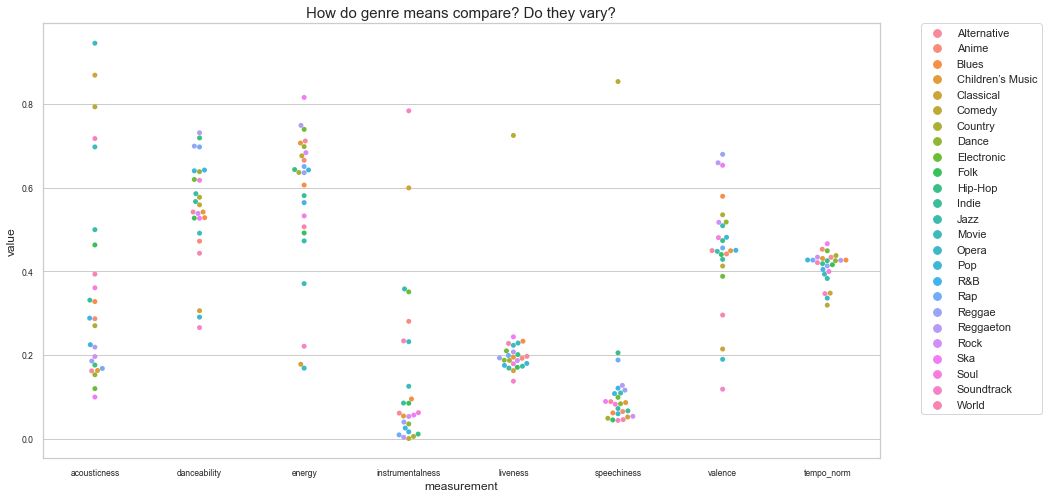

In [122]:
f, ax = plt.subplots(figsize=(15, 8))
ax.tick_params(labelsize = 8.5)
ax.set_title('How do genre means compare? Do they vary?', fontsize = 15)
sns.swarmplot(x="measurement", y="value", hue="genre",data=df3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


We see that in 'instrumentalness', 'liveness', 'speechiness', 'tempo' are pretty clustered. 'valence' is also pretty centered only with a few outliers. This might make classification of genres a bit harder in part 2. 

In [123]:
#dfs = df[0:100]
#igr = info_gain.info_gain(dfs['genre'], dfs)
